# Data Understanding

In this notebook we study the Mimic Dataset with a focus on the clinical notes contained into this dataset.

In the dataset I merged I removed some columns that should not be useful during this first phase of analysis.
Now our goal is to understand how the list of ICD 9 codes is correlated with the clinical note.
What we will do in this notebook:
- We will study the distribution of the ICD_9 codes
- We will study the distribution of the words in the clinical notes
- We will stuty the distribution of the ICD_9 and the number of associated clinical notes w.r.t. the insurance and the admission type.

In [1]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

In [2]:
# Functions

def computeFrequencies(ICD9, frequencies):
    for item in ICD9:
        if item in frequencies:
            frequencies[item] += 1
        else:
            frequencies[item] = 1

In [3]:
df = pd.read_csv('../data/merged_dataset.csv')

In [4]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.shape

(1851243, 10)

In [5]:
df.head()

,SUBJECT_ID,HADM_ID,CATEGORY,INSURANCE,ADMISSION_TYPE,INSURANCE.1,TEXT,Token,ICD9_CODE,DIAGNOSIS
0,22532,167853.0,Discharge summary,Medicare,EMERGENCY,Medicare,Admission Date: [**2151-7-16**] Dischar...,"['service', 'addendum', 'radiologic', 'studies...","['01193', '4254', '42731', '2639', '2762', '50...",RT LOWER LOBE PNEUMONIA
1,22532,167853.0,Discharge summary,Medicare,EMERGENCY,Medicare,Admission Date: [**2151-7-16**] Dischar...,"['history', 'present', 'illness', 'patient', '...","['01193', '4254', '42731', '2639', '2762', '50...",RT LOWER LOBE PNEUMONIA
2,22532,167853.0,Echo,Medicare,EMERGENCY,Medicare,PATIENT/TEST INFORMATION:\nIndication: Aortic ...,"['patient', 'test', 'information', 'indication...","['01193', '4254', '42731', '2639', '2762', '50...",RT LOWER LOBE PNEUMONIA
3,22532,167853.0,Echo,Medicare,EMERGENCY,Medicare,PATIENT/TEST INFORMATION:\nIndication: Endocar...,"['patient', 'test', 'information', 'indication...","['01193', '4254', '42731', '2639', '2762', '50...",RT LOWER LOBE PNEUMONIA
4,22532,167853.0,ECG,Medicare,EMERGENCY,Medicare,Atrial fibrillation with a slow ventricular re...,"['atrial', 'fibrillation', 'slow', 'ventricula...","['01193', '4254', '42731', '2639', '2762', '50...",RT LOWER LOBE PNEUMONIA


## Insurance distribution

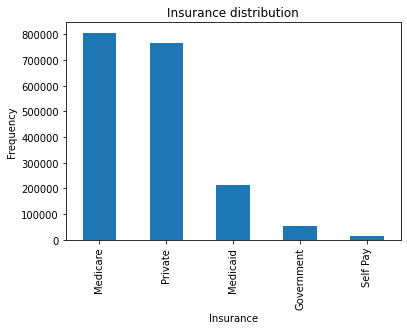

In [8]:
ax = df['INSURANCE'].value_counts().plot(kind='bar', title = "Insurance distribution")
ax.set_xlabel("Insurance")
ax.set_ylabel("Frequency")
fig = ax.get_figure()
fig.savefig("../plot/Insurance_Distribution.png", bbox_inches='tight')

# Distribution of ICD 9 Codes

Here we consider the ICD-9 list associated to each admission.
For each admission we consider the list just one time and we count the length of this list.
In the end we produce a plot with the distribution of the list length.

In [9]:
ICD9_LIST_str = df.drop_duplicates(subset=['HADM_ID'])['ICD9_CODE']
ICD9_LIST = [ast.literal_eval(item) for item in ICD9_LIST_str]

In [10]:
#ICD9_LIST_sorted = [item.sort() for item in ICD9_LIST]
frequencies = {}
for item in ICD9_LIST:
    item.sort()
    if tuple(item) in frequencies:
        frequencies[tuple(item)] += 1
    else:
        frequencies[tuple(item)] = 1
        
frequencies = [(k, v) for k, v in sorted(frequencies.items(), key=lambda item: item[1], reverse=True)]

Analyse the most frequent list of ICD-9 codes:

In [11]:
frequencies[0:40]

[(('V053', 'V290', 'V3000'), 789),
 (('V053', 'V290', 'V3000', 'V502'), 315),
 (('V053', 'V290', 'V3001'), 234),
 (('V053', 'V290', 'V3001', 'V502'), 122),
 (('V290', 'V3000'), 104),
 (('V053', 'V3000'), 68),
 (('7746',), 61),
 (('V053', 'V290', 'V3000', 'V721'), 47),
 (('V053', 'V3001'), 45),
 (('V053', 'V3000', 'V502'), 38),
 (('V053', 'V3001', 'V502'), 37),
 (('7746', 'V053', 'V290', 'V3000'), 36),
 (('4373',), 33),
 (('V290', 'V3001'), 29),
 (('430',), 28),
 (('V053', 'V290', 'V293', 'V3000'), 26),
 (('V290', 'V3000', 'V502'), 25),
 (('2720', '4019', '41401'), 21),
 (('V053', 'V290', 'V3000', 'V502', 'V721'), 21),
 (('7706', 'V053', 'V3001'), 20),
 (('7706', 'V053', 'V290', 'V3001'), 19),
 (('7746', 'V053', 'V290', 'V3001'), 19),
 (('4019', '431'), 17),
 (('7706', 'V053', 'V290', 'V3000'), 17),
 (('76519', '76528', 'V053', 'V290', 'V3000'), 17),
 (('4019', '4373'), 16),
 (('7661', 'V053', 'V290', 'V3001'), 16),
 (('4240',), 15),
 (('V290', 'V3001', 'V502'), 15),
 (('7661', 'V053', 

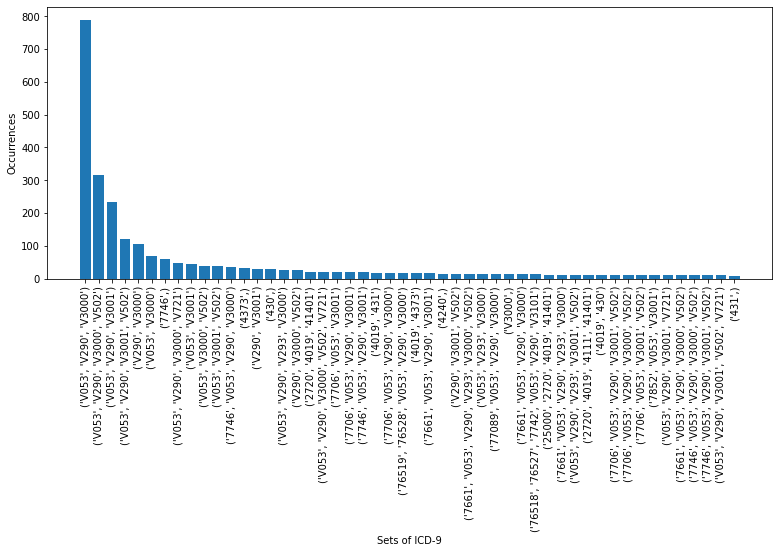

In [12]:
plt.figure(figsize=(13,5))
plt.bar(range(len(frequencies[0:50])), [val[1] for val in frequencies[0:50]], align='center')
plt.xticks(range(len(frequencies[0:50])), [val[0] for val in frequencies[0:50]])
plt.xticks(rotation=90)
plt.xlabel("Sets of ICD-9")
plt.ylabel("Occurrences")
plt.savefig("../plot/ICD9_Frequencies.png", bbox_inches='tight')

In [13]:
def plot_bar_from_counter(
        value_list: Counter, x_axis: str, title: str
    ) -> plt:
        """
        Plots a bar chart
        Parameters:
            df: the dataset
            x_axis: the x axis name
            title: the title of the plot
            column: the column to plot

        Returns:
            plt: the plot
        """

        y = value_list.values()
        x = value_list.keys()

        fig = plt.figure(figsize=(30, 20))
        plt.bar(x, y)
        plt.xlabel(x_axis)
        plt.ylabel("Frequency")
        plt.title(title)
        plt.xticks(rotation=90)
        return plt

In [14]:
all_icd9 = [code for item in ICD9_LIST for code in item]

all_frequencies = Counter()
for code in all_icd9:
    all_frequencies[code] += 1

In [15]:
all_frequencies.most_common(10)

[('4019', 20562),
 ('4280', 13062),
 ('42731', 12805),
 ('41401', 12383),
 ('5849', 9066),
 ('25000', 9003),
 ('2724', 8630),
 ('51881', 7410),
 ('5990', 6522),
 ('53081', 6292)]

In [17]:
"01193" in eval(df.iloc[0:1, :].ICD9_CODE.values[0])

True

In [18]:
filtered_dataset = []
for _, row in df.iterrows():
    codes = eval(row['ICD9_CODE'])
    if "5849" in codes and "4280" in codes and "4019" in codes:
        filtered_dataset.append(row)
filtered_dataset = pd.DataFrame(filtered_dataset)
filtered_dataset.head()

,SUBJECT_ID,HADM_ID,CATEGORY,INSURANCE,ADMISSION_TYPE,INSURANCE.1,TEXT,Token,ICD9_CODE,DIAGNOSIS
293,28063,121936.0,Discharge summary,Medicare,EMERGENCY,Medicare,Admission Date: [**2125-2-9**] D...,"['service', 'medicine', 'allergies', 'zocor', ...","['42843', '41071', '5990', '4275', '5849', '50...",CONGESTIVE HEART FAILURE
294,28063,121936.0,Echo,Medicare,EMERGENCY,Medicare,PATIENT/TEST INFORMATION:\nIndication: Aortic ...,"['patient', 'test', 'information', 'indication...","['42843', '41071', '5990', '4275', '5849', '50...",CONGESTIVE HEART FAILURE
295,28063,121936.0,Echo,Medicare,EMERGENCY,Medicare,PATIENT/TEST INFORMATION:\nIndication: Aortic...,"['patient', 'test', 'information', 'indication...","['42843', '41071', '5990', '4275', '5849', '50...",CONGESTIVE HEART FAILURE
296,28063,121936.0,ECG,Medicare,EMERGENCY,Medicare,Sinus rhythm. Frequent atrial premature beats...,"['sinus', 'rhythm', 'frequent', 'atrial', 'pre...","['42843', '41071', '5990', '4275', '5849', '50...",CONGESTIVE HEART FAILURE
297,28063,121936.0,ECG,Medicare,EMERGENCY,Medicare,Rhythm is most likely sinus rhythm with freque...,"['rhythm', 'likely', 'sinus', 'rhythm', 'frequ...","['42843', '41071', '5990', '4275', '5849', '50...",CONGESTIVE HEART FAILURE


In [19]:
filtered_dataset = filtered_dataset[filtered_dataset['CATEGORY'] == "Discharge summary"]

In [20]:
filtered_dataset.head(400)[200:]

,SUBJECT_ID,HADM_ID,CATEGORY,INSURANCE,ADMISSION_TYPE,INSURANCE.1,TEXT,Token,ICD9_CODE,DIAGNOSIS
227691,69713,174618.0,Discharge summary,Medicare,EMERGENCY,Medicare,Admission Date: [**2181-2-26**] ...,"['date', 'birth', 'sex', 'f', 'service', 'card...","['3968', '5849', '49121', '486', '42833', '518...",RESPIRATORY FAILURE;AORTIC STENOSIS;CONGESTIVE...
227692,69713,174618.0,Discharge summary,Medicare,EMERGENCY,Medicare,"Name: [**Known lastname **],[**Known firstnam...","['date', 'birth', 'sex', 'f', 'service', 'card...","['3968', '5849', '49121', '486', '42833', '518...",RESPIRATORY FAILURE;AORTIC STENOSIS;CONGESTIVE...
227842,30575,145978.0,Discharge summary,Medicaid,EMERGENCY,Medicaid,Admission Date: [**2204-11-24**] ...,"['date', 'birth', 'sex', 'service', 'medicine'...","['9694', '5849', '27803', '2762', '29620', '42...",CO2 NARCOSIS
229479,11944,142622.0,Discharge summary,Medicare,EMERGENCY,Medicare,Admission Date: [**2108-3-22**] ...,"['date', 'birth', 'sex', 'service', 'medicine'...","['57451', '2875', '56985', '496', '4590', '424...",LOWER GI BLEED
230267,32205,194409.0,Discharge summary,Medicare,EMERGENCY,Medicare,Admission Date: [**2133-9-11**] ...,"['service', 'medicine', 'allergies', 'patient'...","['82022', '42823', '7907', '5849', '78559', '5...",CONGESTIVE HEART FAILURE;HIP FRACTURE
...,...,...,...,...,...,...,...,...,...,...
595817,61076,102603.0,Discharge summary,Private,EMERGENCY,Private,Admission Date: [**2148-1-16**] ...,"['date', 'birth', 'sex', 'service', 'medicine'...","['42741', '41071', '51881', '5849', '42821', '...",STATUS POST CARDIAC ARREST
599060,8609,199675.0,Discharge summary,Medicaid,EMERGENCY,Medicaid,Admission Date: [**2109-10-4**] ...,"['date', 'birth', 'sex', 'f', 'service', 'medi...","['2765', '1532', '1977', '4241', '2880', '5849...",COLON CANCER;SEPTIC
600493,88809,150401.0,Discharge summary,Medicare,EMERGENCY,Medicare,Admission Date: [**2134-1-11**] ...,"['date', 'birth', 'sex', 'service', 'medicine'...","['51884', '4820', '42823', '00845', '2760', '5...",AORTIC STENOSIS;HYPOTENSION;PULMONARY EDEMA
611056,16964,164234.0,Discharge summary,Medicare,EMERGENCY,Medicare,Admission Date: [**2103-12-8**] ...,"['date', 'birth', 'sex', 'f', 'service', 'surg...","['0389', '57481', '78552', '5761', '9971', '41...",ACUTE CHOLENGITIS


In [21]:
df[(df['SUBJECT_ID'] == 30575) & (df['CATEGORY'] == "Discharge summary")]

,SUBJECT_ID,HADM_ID,CATEGORY,INSURANCE,ADMISSION_TYPE,INSURANCE.1,TEXT,Token,ICD9_CODE,DIAGNOSIS
211081,30575,114848.0,Discharge summary,Medicaid,EMERGENCY,Medicaid,Admission Date: [**2201-1-31**] ...,"['date', 'birth', 'sex', 'service', 'medicine'...","['2762', '51881', '2920', '29281', '29634', '3...",HYPERCARBIC RESPIRATORY FAILURE
211094,30575,149751.0,Discharge summary,Medicaid,EMERGENCY,Medicaid,Admission Date: [**2203-6-26**] ...,"['date', 'birth', 'sex', 'service', 'medicine'...","['2788', '2762', '29624', '27801', '496', '780...",SHORTNESS OF BREATH
211099,30575,142849.0,Discharge summary,Medicaid,EMERGENCY,Medicaid,Admission Date: [**2204-9-21**] ...,"['date', 'birth', 'sex', 'service', 'medicine'...","['49121', '51881', '514', '2989', '25000', '32...",ASTHMA/COPD EXACERBATION
227834,30575,107242.0,Discharge summary,Medicaid,EMERGENCY,Medicaid,Admission Date: [**2204-11-14**] ...,"['date', 'birth', 'sex', 'service', 'medicine'...","['51881', '5184', '34831', '49121', '27803', '...",PNEUMONIA
227835,30575,107242.0,Discharge summary,Medicaid,EMERGENCY,Medicaid,"Name: [**Known lastname 2797**],[**Known firs...","['j', 'date', 'birth', 'sex', 'service', 'medi...","['51881', '5184', '34831', '49121', '27803', '...",PNEUMONIA
227842,30575,145978.0,Discharge summary,Medicaid,EMERGENCY,Medicaid,Admission Date: [**2204-11-24**] ...,"['date', 'birth', 'sex', 'service', 'medicine'...","['9694', '5849', '27803', '2762', '29620', '42...",CO2 NARCOSIS
227845,30575,186455.0,Discharge summary,Medicaid,EMERGENCY,Medicaid,Admission Date: [**2205-5-28**] ...,"['date', 'birth', 'sex', 'service', 'medicine'...","['51881', '486', '496', '27803', '07054', 'V46...",HYPOXIA


In [22]:
28488
96950
22180
9545
885

885

Now we count the number of codes associated to each admission.

Ex: we have 346 admission with just a single code associated

In [23]:
ICD9_Frequency = pd.Series([len(l) for l in ICD9_LIST]).value_counts().sort_index(ascending=True)

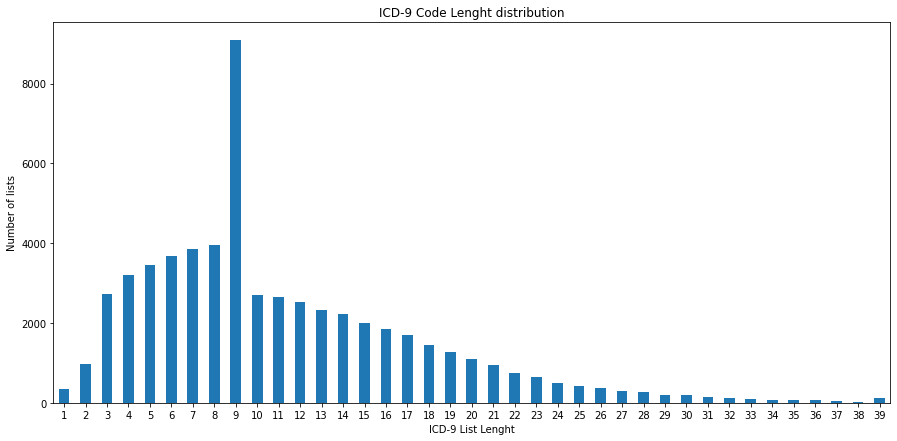

In [24]:
# Numero di liste per lunghezza (ad esempio ci sono 9082 casi di liste da 9 elementi)
plt.figure(figsize=(10,5))
ICD9_Frequency.plot(kind='bar', figsize=(15, 7))
plt.title("ICD-9 Code Lenght distribution")
plt.xlabel("ICD-9 List Lenght")
plt.ylabel("Number of lists")
plt.xticks(rotation=0)
plt.savefig("../plot/ICD9_Frequency.png", bbox_inches='tight')

In [25]:
ICD9_Frequency

1      346
2      980
3     2725
4     3196
5     3458
6     3675
7     3852
8     3951
9     9082
10    2694
11    2648
12    2525
13    2323
14    2218
15    1996
16    1857
17    1696
18    1448
19    1280
20    1092
21     938
22     741
23     635
24     505
25     413
26     367
27     297
28     269
29     202
30     191
31     137
32     118
33      98
34      60
35      65
36      65
37      36
38      30
39     119
dtype: int64

### Why is there a peak in ICD-9 length = 9?

Here we consider the ICD-9 list associated to each admission.
For each admission we consider the list just one time and we count the length of this list.
In the end we produce a plot with the distribution of the list length.

In [26]:
df.head()

,SUBJECT_ID,HADM_ID,CATEGORY,INSURANCE,ADMISSION_TYPE,INSURANCE.1,TEXT,Token,ICD9_CODE,DIAGNOSIS
0,22532,167853.0,Discharge summary,Medicare,EMERGENCY,Medicare,Admission Date: [**2151-7-16**] Dischar...,"['service', 'addendum', 'radiologic', 'studies...","['01193', '4254', '42731', '2639', '2762', '50...",RT LOWER LOBE PNEUMONIA
1,22532,167853.0,Discharge summary,Medicare,EMERGENCY,Medicare,Admission Date: [**2151-7-16**] Dischar...,"['history', 'present', 'illness', 'patient', '...","['01193', '4254', '42731', '2639', '2762', '50...",RT LOWER LOBE PNEUMONIA
2,22532,167853.0,Echo,Medicare,EMERGENCY,Medicare,PATIENT/TEST INFORMATION:\nIndication: Aortic ...,"['patient', 'test', 'information', 'indication...","['01193', '4254', '42731', '2639', '2762', '50...",RT LOWER LOBE PNEUMONIA
3,22532,167853.0,Echo,Medicare,EMERGENCY,Medicare,PATIENT/TEST INFORMATION:\nIndication: Endocar...,"['patient', 'test', 'information', 'indication...","['01193', '4254', '42731', '2639', '2762', '50...",RT LOWER LOBE PNEUMONIA
4,22532,167853.0,ECG,Medicare,EMERGENCY,Medicare,Atrial fibrillation with a slow ventricular re...,"['atrial', 'fibrillation', 'slow', 'ventricula...","['01193', '4254', '42731', '2639', '2762', '50...",RT LOWER LOBE PNEUMONIA


In [27]:
sorted_list = []
for array in df['ICD9_CODE']:
    s = ast.literal_eval(array)
    s.sort()
    sorted_list.append(s)

In [28]:
data = {'ICD_9_list': sorted_list,
        'ICD_9_str': df['ICD9_CODE'],
        'HADM_ID': df['HADM_ID'], 
        'ADMISSION_TYPE': df['ADMISSION_TYPE'],
        'INSURANCE': df['INSURANCE'], 
        'CATEGORY': df['CATEGORY']}

In [29]:
tmp_df = pd.DataFrame(data, columns = ['ICD_9_list', 'ICD_9_str', 'HADM_ID', 'ADMISSION_TYPE', 'INSURANCE', 'CATEGORY'])

In [30]:
tmp_df.head()

,ICD_9_list,ICD_9_str,HADM_ID,ADMISSION_TYPE,INSURANCE,CATEGORY
0,"[01193, 2113, 2639, 2762, 4254, 42731, 5070, 5...","['01193', '4254', '42731', '2639', '2762', '50...",167853.0,EMERGENCY,Medicare,Discharge summary
1,"[01193, 2113, 2639, 2762, 4254, 42731, 5070, 5...","['01193', '4254', '42731', '2639', '2762', '50...",167853.0,EMERGENCY,Medicare,Discharge summary
2,"[01193, 2113, 2639, 2762, 4254, 42731, 5070, 5...","['01193', '4254', '42731', '2639', '2762', '50...",167853.0,EMERGENCY,Medicare,Echo
3,"[01193, 2113, 2639, 2762, 4254, 42731, 5070, 5...","['01193', '4254', '42731', '2639', '2762', '50...",167853.0,EMERGENCY,Medicare,Echo
4,"[01193, 2113, 2639, 2762, 4254, 42731, 5070, 5...","['01193', '4254', '42731', '2639', '2762', '50...",167853.0,EMERGENCY,Medicare,ECG


In [31]:
nine_icd = tmp_df[tmp_df['ICD_9_list'].map(len) == 9]

In [32]:
# We sort the column with the ICD_9

nine_icd = nine_icd.sort_values('ICD_9_str')

In [33]:
nine_icd.reset_index()

,index,ICD_9_list,ICD_9_str,HADM_ID,ADMISSION_TYPE,INSURANCE,CATEGORY
0,561925,"[0051, 2720, 4019, 486, 5070, 51881, 5363, 564...","['0051', '51881', '5070', '486', '7994', '5363...",109103.0,EMERGENCY,Medicare,Nursing/other
1,561908,"[0051, 2720, 4019, 486, 5070, 51881, 5363, 564...","['0051', '51881', '5070', '486', '7994', '5363...",109103.0,EMERGENCY,Medicare,Nursing/other
2,561907,"[0051, 2720, 4019, 486, 5070, 51881, 5363, 564...","['0051', '51881', '5070', '486', '7994', '5363...",109103.0,EMERGENCY,Medicare,Nursing/other
3,561905,"[0051, 2720, 4019, 486, 5070, 51881, 5363, 564...","['0051', '51881', '5070', '486', '7994', '5363...",109103.0,EMERGENCY,Medicare,Nursing/other
4,561904,"[0051, 2720, 4019, 486, 5070, 51881, 5363, 564...","['0051', '51881', '5070', '486', '7994', '5363...",109103.0,EMERGENCY,Medicare,Nursing/other
...,...,...,...,...,...,...,...
383390,766329,"[07032, 07054, 2930, 30401, 30540, 30560, 311,...","['V714', '30401', '30560', '30540', '07054', '...",126813.0,EMERGENCY,Private,Radiology
383391,766328,"[07032, 07054, 2930, 30401, 30540, 30560, 311,...","['V714', '30401', '30560', '30540', '07054', '...",126813.0,EMERGENCY,Private,Discharge summary
383392,766336,"[07032, 07054, 2930, 30401, 30540, 30560, 311,...","['V714', '30401', '30560', '30540', '07054', '...",126813.0,EMERGENCY,Private,Nursing/other
383393,766334,"[07032, 07054, 2930, 30401, 30540, 30560, 311,...","['V714', '30401', '30560', '30540', '07054', '...",126813.0,EMERGENCY,Private,Nursing/other


In [34]:
nine_icd.shape

(383395, 6)

In [35]:
# Dataframe with all the informations about the admissions with 9 associated ICD9 codes

nine_icd_single_admission = nine_icd[~nine_icd.duplicated(subset='HADM_ID', keep='first')]

In [36]:
nine_icd_single_admission

,ICD_9_list,ICD_9_str,HADM_ID,ADMISSION_TYPE,INSURANCE,CATEGORY
561925,"[0051, 2720, 4019, 486, 5070, 51881, 5363, 564...","['0051', '51881', '5070', '486', '7994', '5363...",109103.0,EMERGENCY,Medicare,Nursing/other
1305530,"[00845, 0389, 2762, 2767, 4019, 5185, 5849, 99...","['00845', '0389', '99592', '5185', '2762', '58...",171246.0,EMERGENCY,Private,Radiology
602011,"[00845, 0389, 2764, 2765, 41071, 4240, 4280, 4...","['00845', '2765', '2764', '4240', '7070', '410...",109308.0,EMERGENCY,Medicare,Radiology
1246605,"[00845, 1105, 2449, 28529, 311, 3453, 486, 599...","['00845', '3453', '5990', '486', '2449', '311'...",119207.0,EMERGENCY,Medicare,Discharge summary
575470,"[00845, 1578, 1977, 2767, 29281, 41519, 5849, ...","['00845', '41519', '5849', '29281', '1578', '1...",197934.0,EMERGENCY,Private,Radiology
...,...,...,...,...,...,...
965442,"[25000, 27652, 29590, 2967, 319, 7380, 73819, ...","['V5841', '29590', '27652', '7380', '73819', '...",160019.0,ELECTIVE,Medicaid,ECG
1690406,"[042, 0970, 2726, 29680, 53081, 6929, 7905, V1...","['V5883', '042', '0970', '6929', 'V140', '2968...",164835.0,EMERGENCY,Private,Discharge summary
913880,"[2859, 3320, 4019, 57481, 5761, 5770, 6930, 78...","['V6441', '6930', '5770', '57481', '78039', '5...",155197.0,EMERGENCY,Medicaid,Discharge summary
452613,"[07070, 2930, 3009, 30500, 30560, 311, E8160, ...","['V714', '07070', '30560', '3009', 'E9588', 'E...",166965.0,EMERGENCY,Private,Nursing/other


In [37]:
nine_icd_single_admission.shape

(9082, 6)

In [38]:
# Dataframe with the records that contain duplicated in the ICD_9 list

nine_icd_duplicated_ICD9 = nine_icd_single_admission[nine_icd_single_admission.astype(str).duplicated('ICD_9_list', keep=False)]
nine_icd_duplicated_ICD9.sort_values('ICD_9_list')

,ICD_9_list,ICD_9_str,HADM_ID,ADMISSION_TYPE,INSURANCE,CATEGORY
806765,"[76514, 76525, 769, 77081, 7742, 7766, 77981, ...","['V3101', '76514', '76525', '769', '7742', '77...",136234.0,NEWBORN,Private,Nursing/other
919953,"[76514, 76525, 769, 77081, 7742, 7766, 77981, ...","['V3101', '769', '7742', '76514', '76525', '77...",161750.0,NEWBORN,Private,Nursing/other
899770,"[76515, 76525, 769, 77081, 7742, 7793, V053, V...","['V3401', '76515', '769', '7742', '7793', '765...",199657.0,NEWBORN,Private,Nursing/other
899998,"[76515, 76525, 769, 77081, 7742, 7793, V053, V...","['V3401', '76515', '769', '7793', '7742', '765...",152811.0,NEWBORN,Private,Nursing/other
661867,"[76516, 76526, 769, 77081, 7742, 7793, 77981, ...","['V3101', '76516', '76526', '769', '7742', '77...",123428.0,NEWBORN,Private,Nursing/other
833345,"[76516, 76526, 769, 77081, 7742, 7793, 77981, ...","['V3101', '76516', '769', '7793', '7742', '765...",155967.0,NEWBORN,Private,Nursing/other
531118,"[76518, 76527, 769, 77081, 7742, 7793, V053, V...","['V3001', '769', '7742', '7793', '76518', '765...",113153.0,NEWBORN,Medicaid,Nursing/other
1289574,"[76518, 76527, 769, 77081, 7742, 7793, V053, V...","['V3001', '769', '7793', '7742', '76518', '765...",157850.0,NEWBORN,Private,Nursing/other


In [39]:
nine_icd_duplicated_ICD9.shape

(8, 6)

In [40]:
# We compute the frequency of each list of ICD_9

frequencies_list = {}
for item in nine_icd_single_admission['ICD_9_list']:

    if tuple(item) in frequencies_list:
        frequencies_list[tuple(item)] += 1
    else:
        frequencies_list[tuple(item)] = 1
        
frequencies_list = [(k, v) for k, v in sorted(frequencies_list.items(), key=lambda item: item[1], reverse=True)]

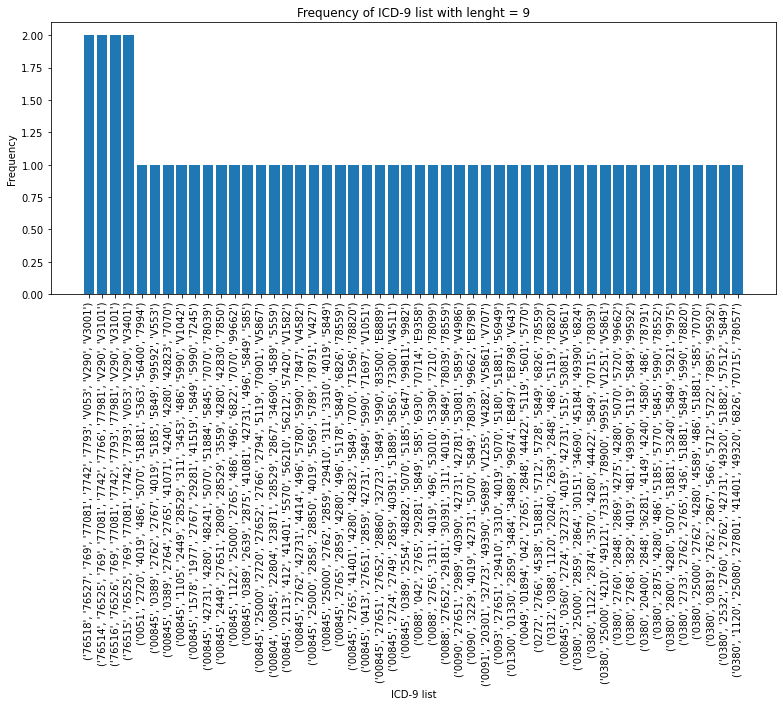

In [41]:
# We plot the frequency of each lists of ICD_9

plt.figure(figsize=(13,5))
plt.bar(range(len(frequencies_list[0:50])), [val[1] for val in frequencies_list[0:50]], align='center')
plt.xticks(range(len(frequencies_list[0:50])), [val[0] for val in frequencies_list[0:50]])
plt.xticks(rotation=90)
plt.xlabel('ICD-9 list')
plt.ylabel('Frequency')
plt.title('Frequency of ICD-9 list with lenght = 9')
plt.savefig("../plot/ICD-9_list_frequency_with_length9.png", bbox_inches='tight')

We can see that almost all the list of ICD-9 with 9 codes appear only 1 time in the dataset, we only have 4 exceptions:

('76518', '76527', '769', '77081', '7742', '7793', 'V053', 'V290', 'V3001')

('76516', '76526', '769', '77081', '7742', '7793', '77981', 'V290', 'V3101')

('76514', '76525', '769', '77081', '7742', '7766', '77981', 'V290', 'V3101')

('76515', '76525', '769', '77081', '7742', '7793', 'V053', 'V290', 'V3401')

76518 = Other preterm infants, 2,000-2,499 grams 

76516 = Other preterm infants, 1,500-1,749 grams

76514 = Other preterm infants, 1,000-1,249 grams

76515 = Other preterm infants, 1,250-1,499 grams

76527 = 33-34 completed weeks of gestation

76526 = 31-32 completed weeks of gestation

76525 = 29-30 completed weeks of gestation

769   = Respiratory distress syndrome in newborn

77081 = Primary apnea of newborn

7742  = Neonatal jaundice associated with preterm delivery

7793  = Feeding problems in newborn

V053  = Need for prophylactic vaccination and inoculation against viral hepatitis

77981 = Neonatal bradycardia

V053  =	Need for prophylactic vaccination and inoculation against viral hepatitis

V290  = Observation for suspected infectious condition

V3001 = Single liveborn, born in hospital, delivered by cesarean section

In [42]:
categories = nine_icd_single_admission['CATEGORY']
admissionType = nine_icd_single_admission['ADMISSION_TYPE']
insurance = nine_icd_single_admission['INSURANCE']

In [43]:
## Now we consider the categories, the admission type and the insurance and then we compute the 
## frequency for each of these.

categories_Frequency = {}
computeFrequencies(categories, categories_Frequency)
categories_Frequency = [(k, v) for k, v in sorted(categories_Frequency.items(), key=lambda item: item[1], reverse=True)]

admissionType_Frequency = {}
computeFrequencies(admissionType, admissionType_Frequency)
admissionType_Frequency = [(k, v) for k, v in sorted(admissionType_Frequency.items(), key=lambda item: item[1], reverse=True)]

insurance_Frequency = {}
computeFrequencies(insurance, insurance_Frequency)
insurance_Frequency = [(k, v) for k, v in sorted(insurance_Frequency.items(), key=lambda item: item[1], reverse=True)]

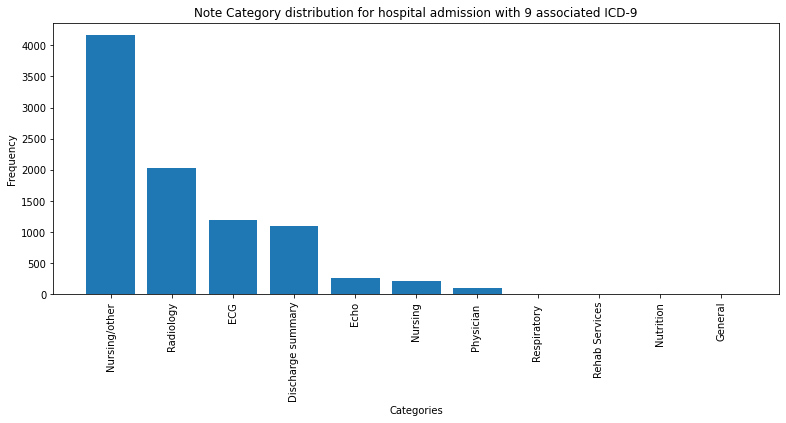

In [44]:
#frequencies[0:50].plot(kind='bar', figsize=(15, 7))
plt.figure(figsize=(13,5))
plt.bar(range(len(categories_Frequency)), [val[1] for val in categories_Frequency], align='center')
plt.xticks(range(len(categories_Frequency)), [val[0] for val in categories_Frequency])
plt.xticks(rotation=90)
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Note Category distribution for hospital admission with 9 associated ICD-9')
plt.savefig("../plot/List9Categories.png", bbox_inches='tight')

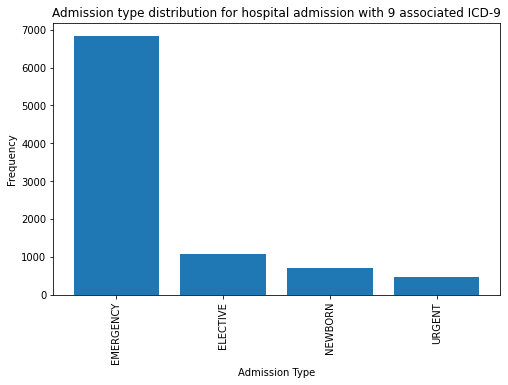

In [45]:
#frequencies[0:50].plot(kind='bar', figsize=(15, 7))
plt.figure(figsize=(8,5))
plt.bar(range(len(admissionType_Frequency)), [val[1] for val in admissionType_Frequency], align='center')
plt.xticks(range(len(admissionType_Frequency)), [val[0] for val in admissionType_Frequency])
plt.xticks(rotation=90)
plt.xlabel('Admission Type')
plt.ylabel('Frequency')
plt.title('Admission type distribution for hospital admission with 9 associated ICD-9')
plt.savefig("../plot/List9AdmissionType.png", bbox_inches='tight')

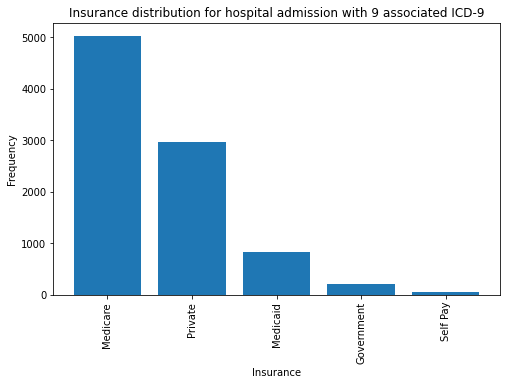

In [46]:
#frequencies[0:50].plot(kind='bar', figsize=(15, 7))
plt.figure(figsize=(8,5))
plt.bar(range(len(insurance_Frequency)), [val[1] for val in insurance_Frequency], align='center')
plt.xticks(range(len(insurance_Frequency)), [val[0] for val in insurance_Frequency])
plt.xticks(rotation=90)
plt.xlabel('Insurance')
plt.ylabel('Frequency')
plt.title('Insurance distribution for hospital admission with 9 associated ICD-9')
plt.savefig("../plot/List9Insurance.png", bbox_inches='tight')

In [47]:
ICD9 = [x for l in nine_icd_single_admission['ICD_9_list'] for x in l]

In [48]:
frequencies = {}
computeFrequencies(ICD9, frequencies)

In [49]:
frequencies = [(k, v) for k, v in sorted(frequencies.items(), key=lambda item: item[1], reverse=True)]

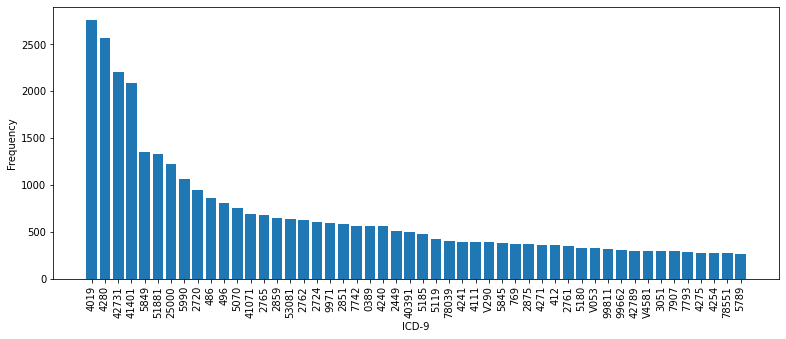

In [50]:
#frequencies[0:50].plot(kind='bar', figsize=(15, 7))
plt.figure(figsize=(13,5))
plt.bar(range(len(frequencies[0:50])), [val[1] for val in frequencies[0:50]], align='center')
plt.xticks(range(len(frequencies[0:50])), [val[0] for val in frequencies[0:50]])
plt.xticks(rotation=90)
plt.xlabel("ICD-9")
plt.ylabel("Frequency")
plt.savefig("../plot/List9ICD9.png", bbox_inches='tight')

In the previous plot we can see the distribution of the most common ICD-9 that we can found in the lists with 9 ICD-9 codes.

4019 =  Unspecified essential hypertension

4280 =  Congestive heart failure, unspecified

42731 = Atrial fibrillation

41401 = Coronary atherosclerosis of native coronary artery

5849 =  Acute kidney failure, unspecified

51881 = Acute respiratory failure

25000 = Diabetes mellitus without mention of complication, type II or unspecified type, not stated as uncontrolled

5990 =  Urinary tract infection, site not specified

2720 =  Pure hypercholesterolemia

486 =  	Pneumonia, organism unspecified

496 =   Chronic airway obstruction, not elsewhere classified

5070 =  Pneumonitis due to inhalation of food or vomitus

41071 = Subendocardial infarction, initial episode of care

2765 =  Volume depletion disorder

### Note Length - Boxplot

In [51]:
df.head()

,SUBJECT_ID,HADM_ID,CATEGORY,INSURANCE,ADMISSION_TYPE,INSURANCE.1,TEXT,Token,ICD9_CODE,DIAGNOSIS
0,22532,167853.0,Discharge summary,Medicare,EMERGENCY,Medicare,Admission Date: [**2151-7-16**] Dischar...,"['service', 'addendum', 'radiologic', 'studies...","['01193', '4254', '42731', '2639', '2762', '50...",RT LOWER LOBE PNEUMONIA
1,22532,167853.0,Discharge summary,Medicare,EMERGENCY,Medicare,Admission Date: [**2151-7-16**] Dischar...,"['history', 'present', 'illness', 'patient', '...","['01193', '4254', '42731', '2639', '2762', '50...",RT LOWER LOBE PNEUMONIA
2,22532,167853.0,Echo,Medicare,EMERGENCY,Medicare,PATIENT/TEST INFORMATION:\nIndication: Aortic ...,"['patient', 'test', 'information', 'indication...","['01193', '4254', '42731', '2639', '2762', '50...",RT LOWER LOBE PNEUMONIA
3,22532,167853.0,Echo,Medicare,EMERGENCY,Medicare,PATIENT/TEST INFORMATION:\nIndication: Endocar...,"['patient', 'test', 'information', 'indication...","['01193', '4254', '42731', '2639', '2762', '50...",RT LOWER LOBE PNEUMONIA
4,22532,167853.0,ECG,Medicare,EMERGENCY,Medicare,Atrial fibrillation with a slow ventricular re...,"['atrial', 'fibrillation', 'slow', 'ventricula...","['01193', '4254', '42731', '2639', '2762', '50...",RT LOWER LOBE PNEUMONIA


In [52]:
len_dict = {}

In [53]:
for index, row in df.iterrows():
    if len_dict.get(row['CATEGORY'], None):
        len_dict[row['CATEGORY']].append(len(row.TEXT))
    else:
        len_dict[row['CATEGORY']] = [len(row.TEXT)]

Text(0, 0.5, 'Note Length')

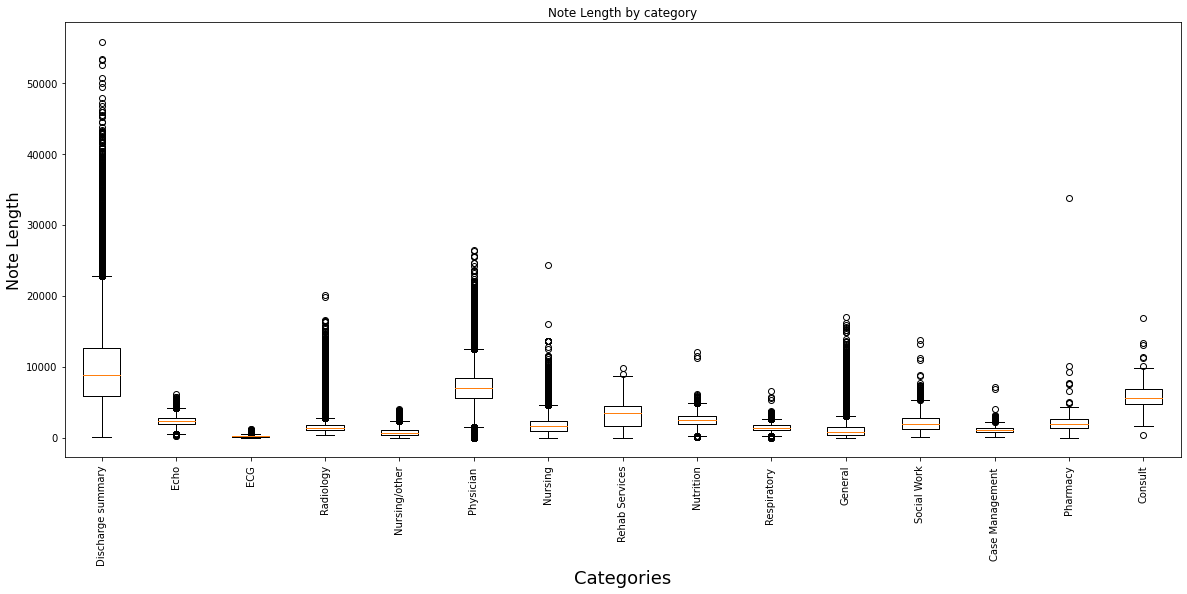

In [54]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.boxplot(len_dict.values())
ax.set_xticklabels(len_dict.keys(),rotation=90)
ax.set_title("Note Length by category")
ax.set_xlabel('Categories', fontsize=18)
ax.set_ylabel('Note Length', fontsize=16)

# Notes for each admission

Now we consider the number of notes associated to each admission, we count them and then we plot the distribution in a histogram.

In [55]:
Notes_List = df.groupby(['HADM_ID']).count()['TEXT'].value_counts()

Text(0, 0.5, 'Admissions')

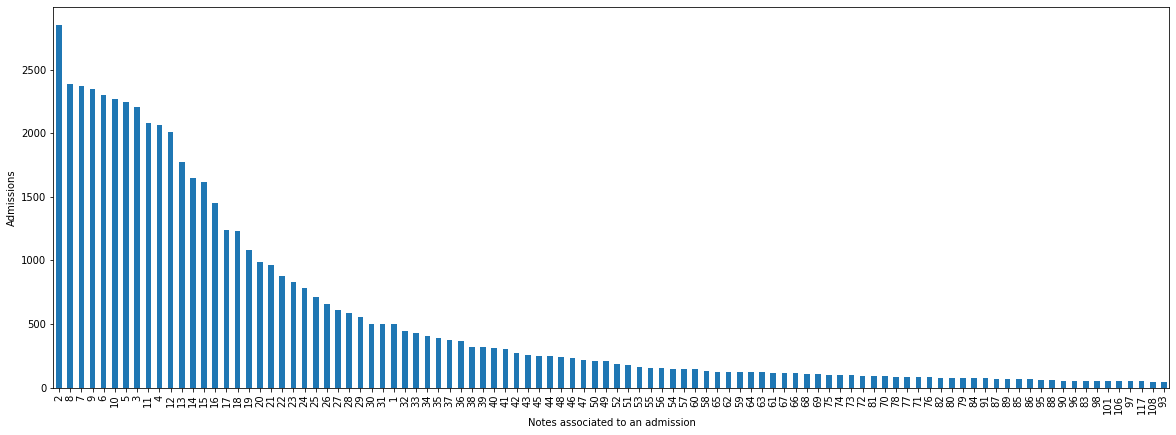

In [56]:
ax = Notes_List[0:100].plot(kind='bar', figsize=(20, 7))
ax.set_xlabel("Notes associated to an admission")
ax.set_ylabel("Admissions")
# 2848 ammissioni hanno 2 note associate.... 1 ammissione ha 959 note associate
# la x è il numero di note associate, la y è il numero di ammissioni

In [57]:
df.groupby(['HADM_ID']).count()['TEXT'].describe()

count    58328.000000
mean        31.738496
std         59.662031
min          1.000000
25%          8.000000
50%         15.000000
75%         31.000000
max       1233.000000
Name: TEXT, dtype: float64

Now we want to study the notes length distribution

{'whiskers': [<matplotlib.lines.Line2D at 0x2905e69a0>,
 'caps': [<matplotlib.lines.Line2D at 0x2905e6f40>,
 'boxes': [<matplotlib.lines.Line2D at 0x2905e66d0>],
 'medians': [<matplotlib.lines.Line2D at 0x2905f5520>],
 'fliers': [<matplotlib.lines.Line2D at 0x2905f57f0>],
 'means': []}

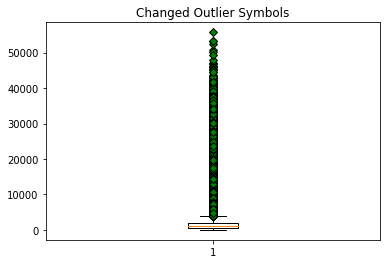

In [58]:
note_length = pd.Series([len(text) for text in df['TEXT']])
green_diamond = dict(markerfacecolor='g', marker='D')
fig3, ax3 = plt.subplots()
ax3.set_title('Changed Outlier Symbols')
ax3.boxplot(note_length, flierprops=green_diamond)

In [59]:
note_length.mean()

1871.044605705464

We checked the lenght of the notes and we noticed that some notes have a lenght in range 0,10. We checked these notes and we noticed that are just noise, se we deleted the rows from the dataset. 

In [60]:
notes = pd.Series([text for text in df['TEXT'] if len(text) > 0 and len(text) < 10])
tmpdf = df[0:1000]

In [61]:
note_length_frequency = pd.Series([len(text) for text in df['TEXT']]).value_counts()
# Ci stanno 1696 note con una lunghezza di 188
note_length_frequency[0:40]

188    1696
185    1693
198    1684
170    1676
184    1671
187    1670
226    1669
208    1668
193    1666
189    1665
182    1657
178    1656
159    1655
222    1655
211    1649
186    1647
201    1644
205    1643
190    1639
210    1636
195    1635
209    1635
174    1628
200    1623
204    1622
218    1621
180    1621
219    1616
206    1616
239    1614
197    1613
207    1611
173    1608
215    1606
212    1606
181    1605
203    1603
221    1603
160    1601
237    1600
dtype: int64

<AxesSubplot:>

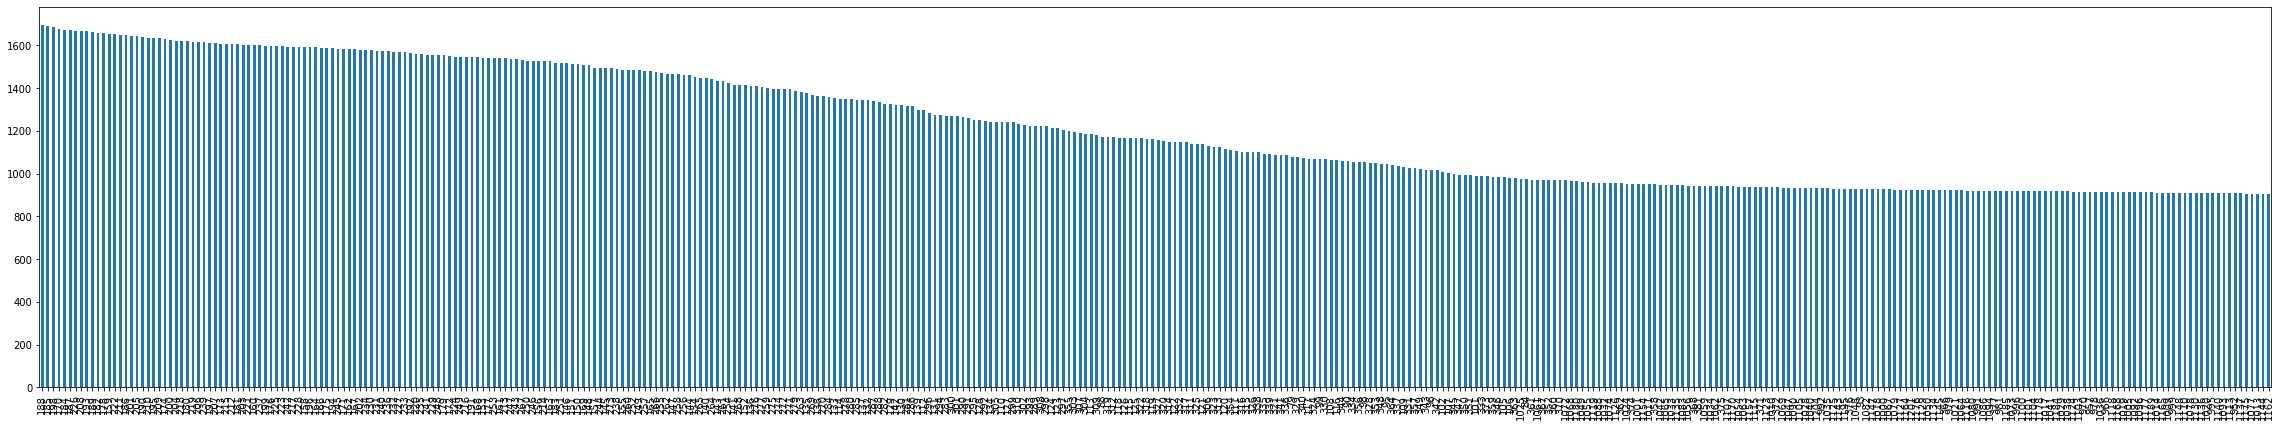

In [62]:
note_length_frequency[0:400].plot(kind='bar', figsize=(40, 7))

In [63]:
note_length = pd.Series([len(text) for text in df['TEXT']])
print(note_length.mean())
print(note_length.std())
print(note_length.min())
print(note_length.max())

1871.044605705464
2611.7690295714156
3
55728


# Admission Type

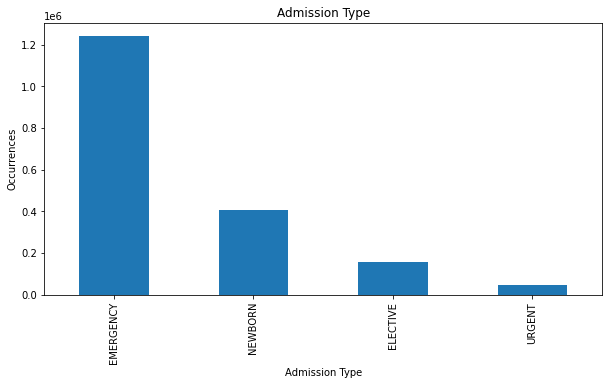

In [64]:
plt.figure(figsize=(10,5))
df['ADMISSION_TYPE'].value_counts().plot(kind='bar')
plt.title("Admission Type")
plt.xlabel("Admission Type")
plt.ylabel("Occurrences")
plt.savefig("../plot/Admission_Type.png", bbox_inches='tight')

### Notes Frequency distribution per Admission Type

In [65]:
admissionType = df['ADMISSION_TYPE'].unique()

<AxesSubplot:title={'center':'Note Frequency Distribution'}, xlabel='Number of Notes', ylabel='Frequency'>

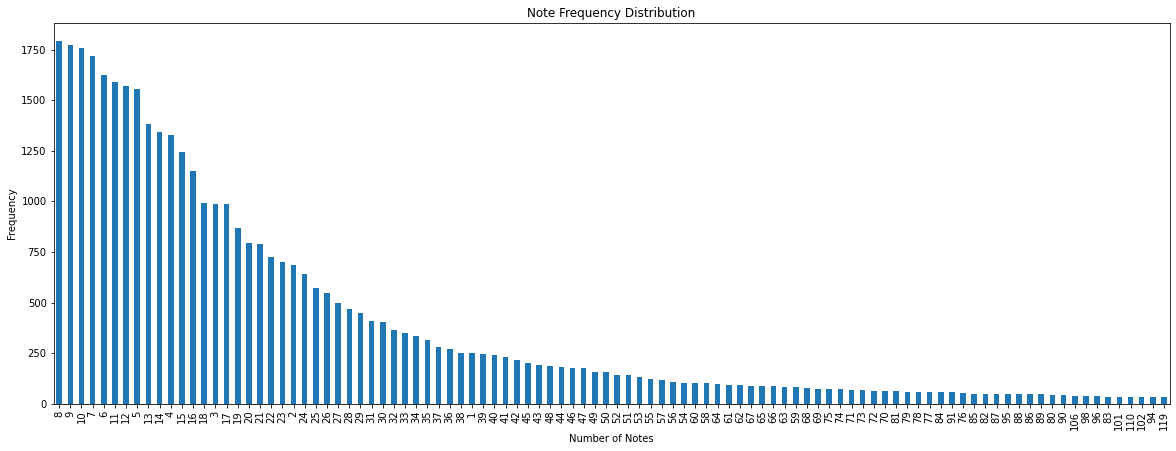

In [66]:
Notes_List = df[(df['ADMISSION_TYPE']=='EMERGENCY')].groupby(['HADM_ID']).count()['TEXT'].value_counts()
Notes_List[0:100].plot(kind='bar', figsize=(20, 7), title="Note Frequency Distribution", xlabel="Number of Notes", ylabel="Frequency")

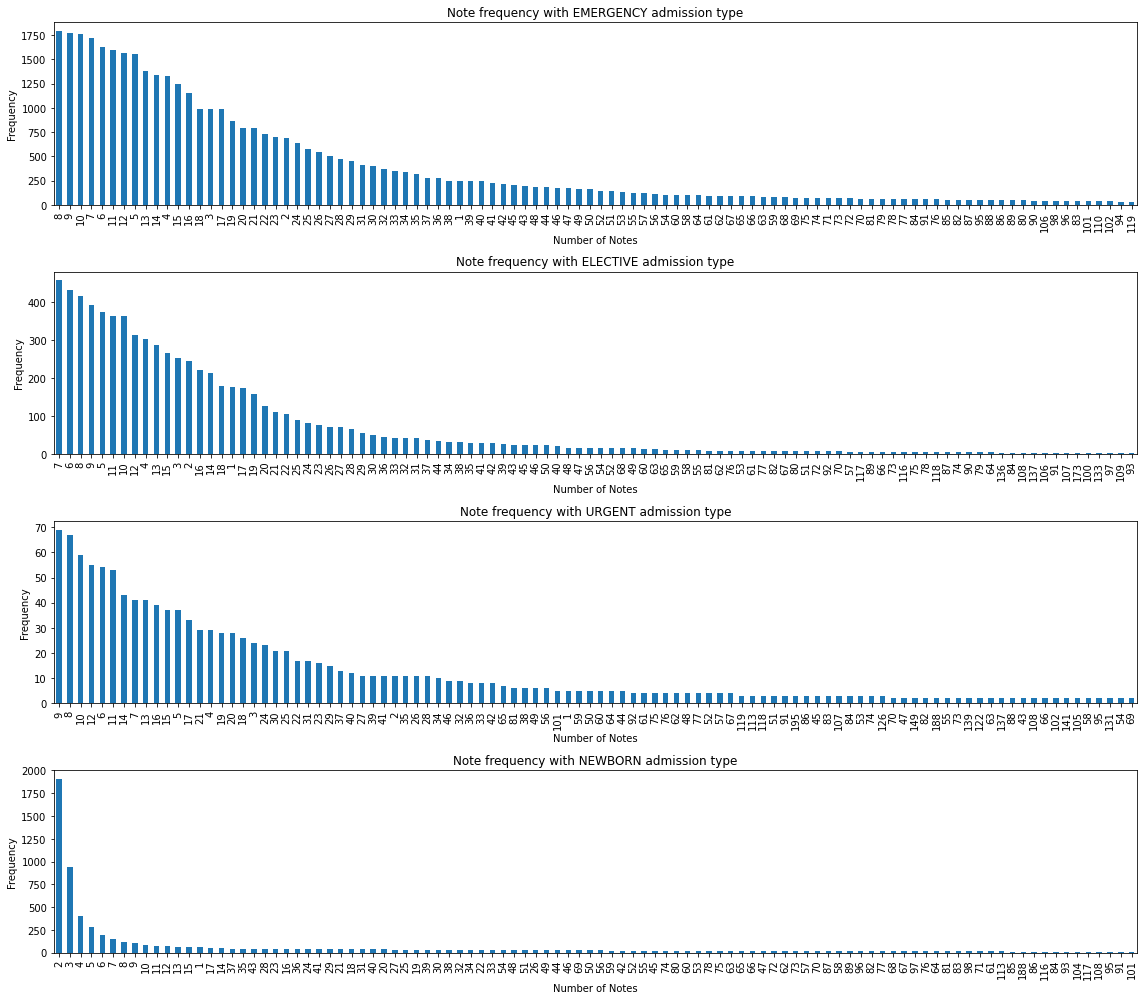

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

In [67]:
fig, ax = plt.subplots(
    4, 1, figsize=(20,15)
)

i, j = 0, 0

for idx, col in enumerate(admissionType):
    plt.figure(figsize=(20,15))
    Notes_List = df[(df['ADMISSION_TYPE']==col)].groupby(['HADM_ID']).count()['TEXT'].value_counts()
    Notes_List[0:100].plot(kind='bar', figsize=(16, 14), ax=ax[j], xlabel="Number of Notes", ylabel="Frequency")
    
    ax[j].set_title(f"Note frequency with {col} admission type")
    j+=1

fig.tight_layout()
Notes_List_admissionType = df.groupby(['HADM_ID']).count()['TEXT'].value_counts()

# Notes Category

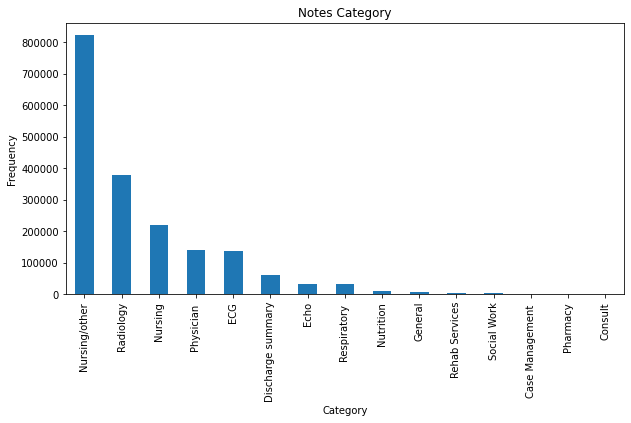

In [68]:
plt.figure(figsize=(10,5))
df['CATEGORY'].value_counts().plot(kind='bar')
plt.title("Notes Category")
plt.xlabel("Category")
plt.ylabel("Frequency")
plt.savefig("../plot/Notes_Category.png", bbox_inches='tight')

In [69]:
grouped_notes = df.groupby('HADM_ID')['TEXT'].count().value_counts()

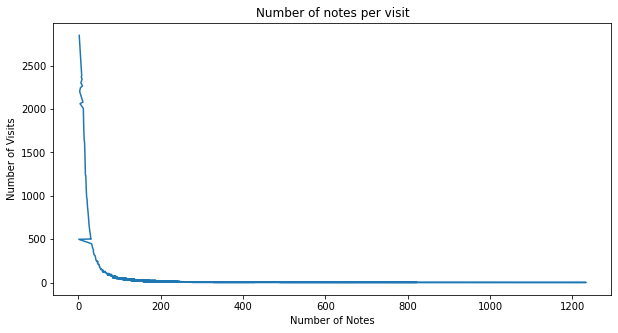

In [70]:
plt.figure(figsize=(10,5))
grouped_notes.plot()
plt.title("Number of notes per visit")
plt.xlabel("Number of Notes")
plt.ylabel("Number of Visits")
plt.savefig("../plot/notes_per_visit.png", bbox_inches='tight')

In [71]:
df.groupby('HADM_ID')['TEXT'].count().agg(['mean', 'count', 'max', 'min'])

mean        31.738496
count    58328.000000
max       1233.000000
min          1.000000
Name: TEXT, dtype: float64

In [72]:
df[df['CATEGORY'] == 'ECG']['TEXT']

4          Atrial fibrillation with a slow ventricular re...
5          Atrial fibrillation with a slow ventricular re...
6          Atrial fibrillation with a slow ventricular re...
7          Atrial fibrillation with a rapid ventricular r...
33         Sinus rhythm\nConsider left ventricular hypert...
                                 ...                        
1834188    Normal sinus rhythm. Top normal P-R interval a...
1834193    Sinus tachycardia. Left atrial abnormality. Si...
1834194    Sinus rhythm\n - premature ventricular contrac...
1834202    Sinus rhythm. Non-specific intraventricular co...
1834215    Normal sinus rhythm, rate 98.  Minor non-speci...
Name: TEXT, Length: 138185, dtype: object

### Notes Frequency distribution per Note Category

In [73]:
categoryTipe = df['CATEGORY'].unique()

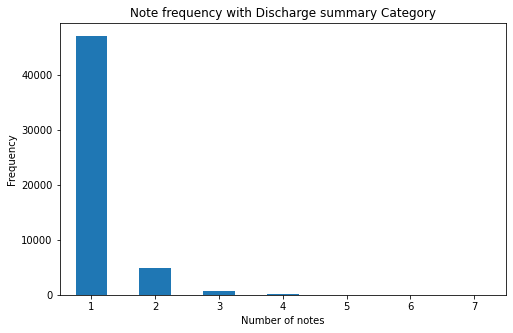

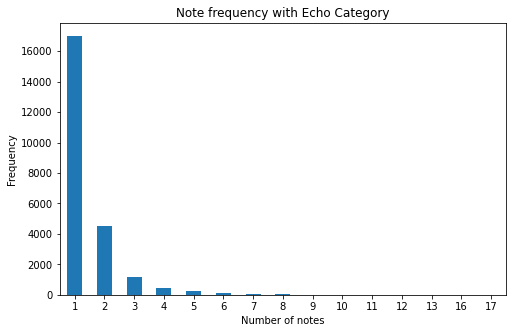

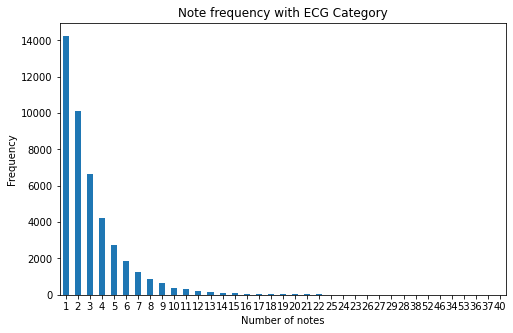

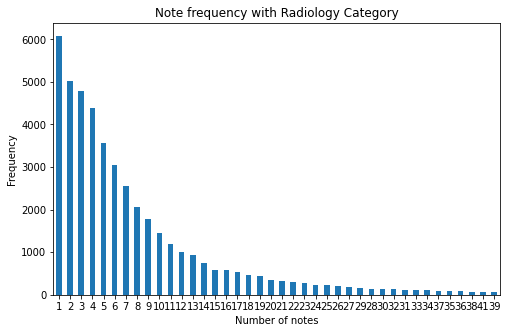

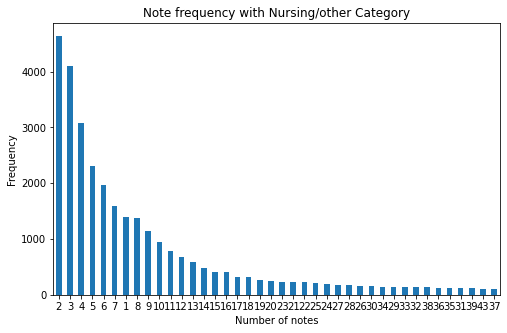

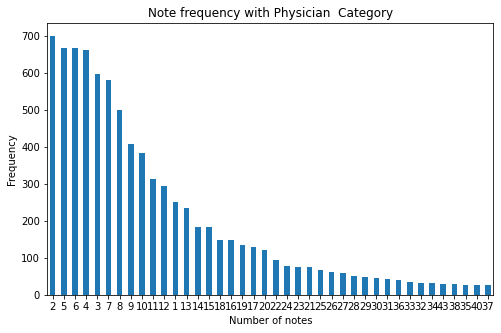

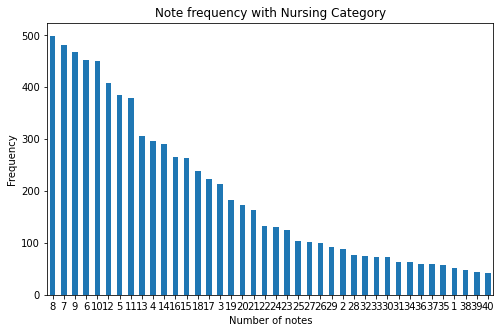

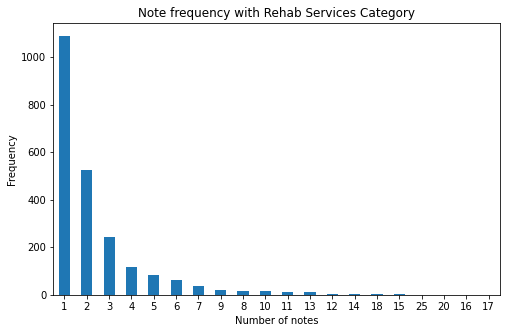

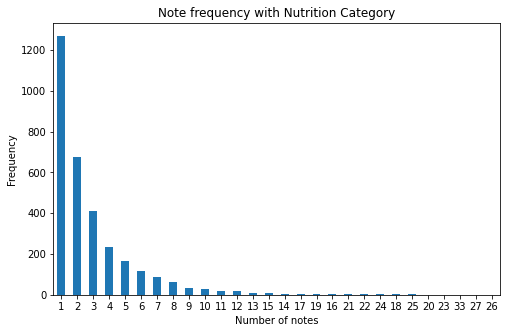

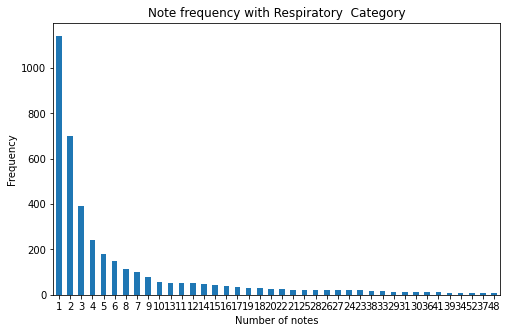

In [74]:
for idx, col in enumerate(categoryTipe[:10]):
    plt.figure(figsize=(8,5))
    Notes_List = df[(df['CATEGORY']==col)].groupby(['HADM_ID']).count()['TEXT'].value_counts()
    if(len(Notes_List) > 40):
        ax = Notes_List[0:40].plot(kind='bar', rot=0)
        
    else:
        ax = Notes_List[0:40].plot(kind='bar', rot=0)
    
    ax.set_title(f"Note frequency with {col} Category")
    ax.set_xlabel("Number of notes")
    ax.set_ylabel("Frequency")
    
    ax.set_title(f"Note frequency with {col} Category")

Notes_List_CATEGORY = df.groupby(['HADM_ID']).count()['TEXT'].value_counts()

# Types of notes

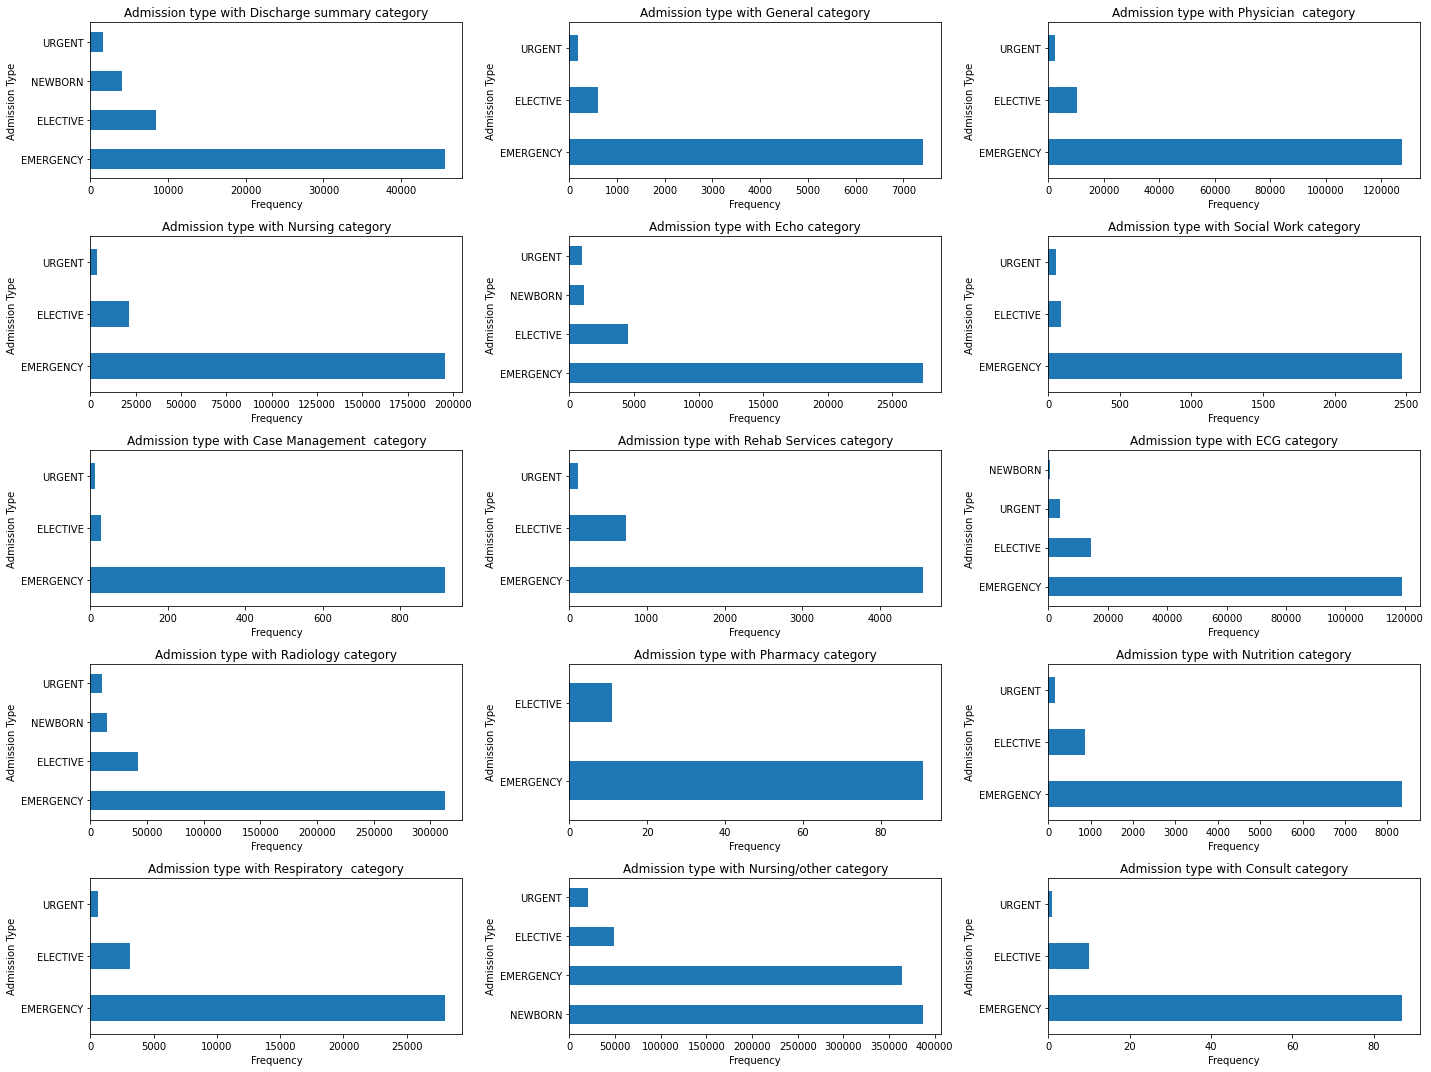

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

In [75]:
myFeatures = df['CATEGORY'].unique()

fig, ax = plt.subplots(
    5, 3, figsize=(20,15)
)

for idx, col in enumerate(myFeatures):
    plt.figure(figsize=(20,15))
    df[(df['CATEGORY']==col)].ADMISSION_TYPE.value_counts().plot.barh(ax=ax[idx%5, idx%3])
    ax[idx%5, idx%3].set_title(f"Admission type with {col} category")
    ax[idx%5, idx%3].set_xlabel("Frequency")
    ax[idx%5, idx%3].set_ylabel("Admission Type")


fig.tight_layout()
fig.savefig("../plot/Admission_Type_with_Categories.png")

In [6]:
df['ADMISSION_TYPE'].nunique()

4

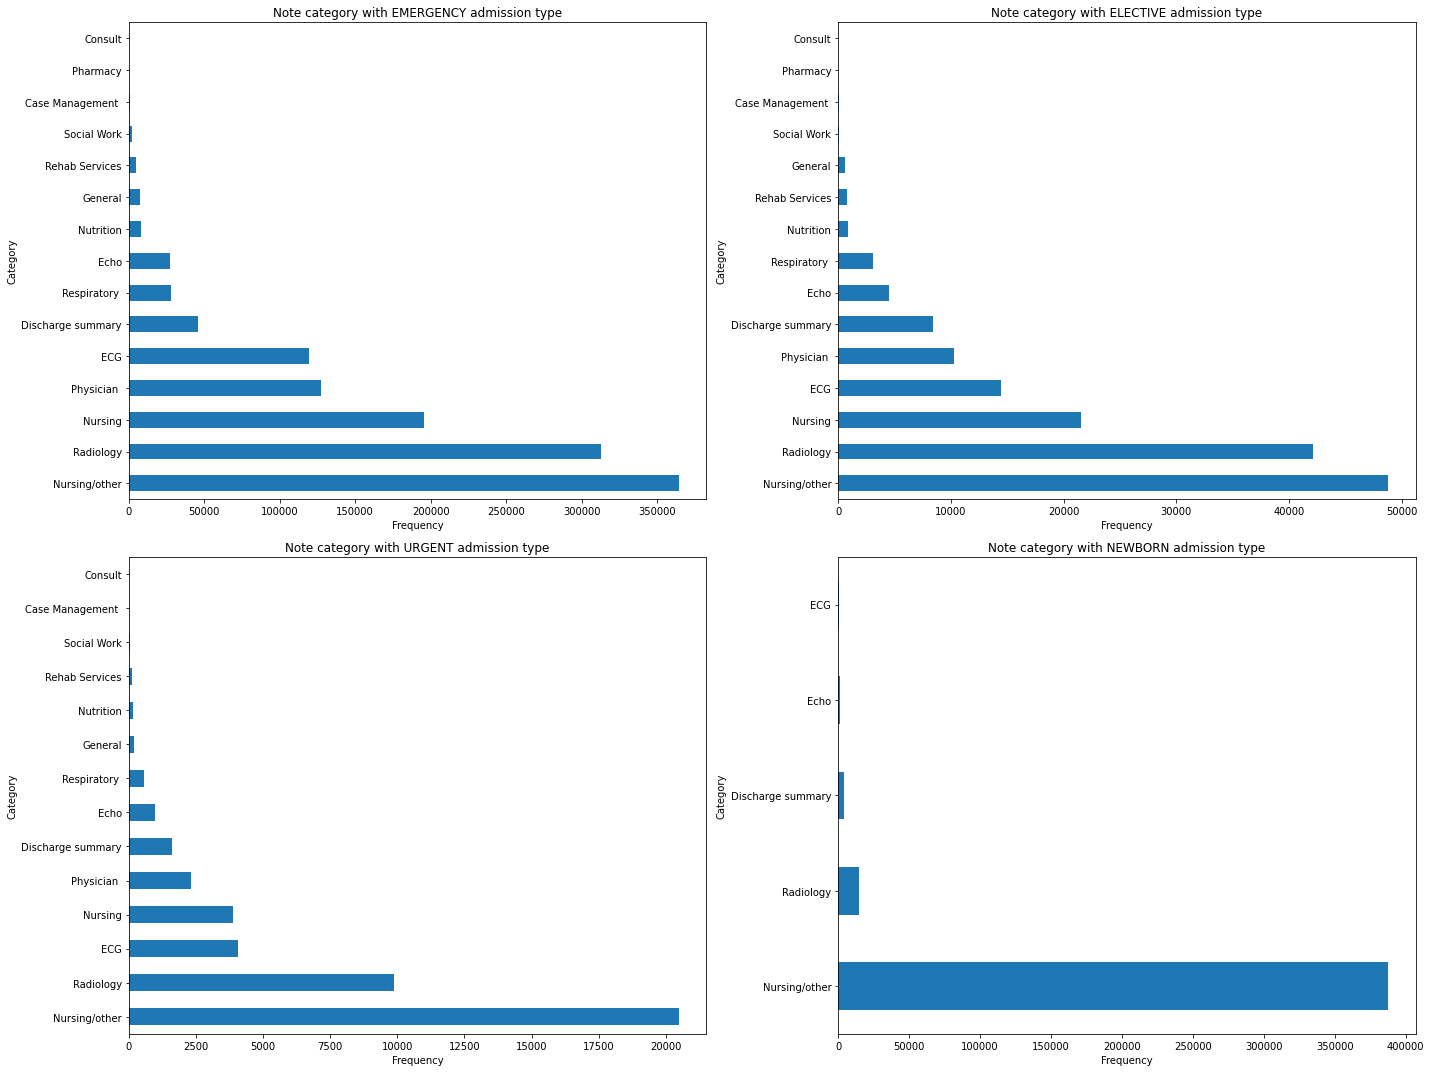

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

In [7]:
myFeatures = df['ADMISSION_TYPE'].unique()

fig, ax = plt.subplots(
    2, 2, figsize=(20,15)
)
ax_list = [ax[0, 0], ax[0, 1], ax[1, 0], ax[1, 1]]
for idx, col in enumerate(myFeatures):
    
    plt.figure(figsize=(20,15))
    df[(df['ADMISSION_TYPE']==col)].CATEGORY.value_counts().plot.barh(ax=ax_list[idx])
    ax_list[idx].set_title(f"Note category with {col} admission type")
    ax_list[idx].set_xlabel("Frequency")
    ax_list[idx].set_ylabel("Category")

fig.tight_layout()
fig.savefig("../plot/Note_category_with_AdmissionType.png")

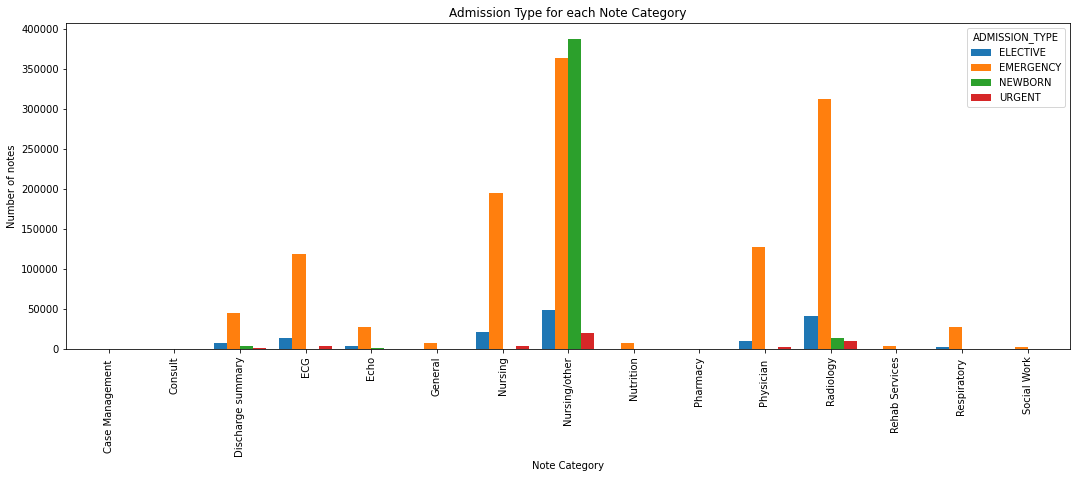

In [8]:
ax = df.groupby('ADMISSION_TYPE').CATEGORY.value_counts().unstack(0).plot.bar(width=0.8)
ax.set_title("Admission Type for each Note Category")
ax.set_xlabel("Note Category")
ax.set_ylabel("Number of notes")
ax.figure.set_size_inches(18, 6)
fig.savefig("../plot/admission_type_per_note_category.png")

In [9]:
df.groupby('ADMISSION_TYPE').CATEGORY.value_counts()

ADMISSION_TYPE  CATEGORY         
ELECTIVE        Nursing/other         48819
                Radiology             42126
                Nursing               21503
                ECG                   14400
                Physician             10244
                Discharge summary      8378
                Echo                   4504
                Respiratory            3107
                Nutrition               874
                Rehab Services          736
                General                 606
                Social Work              86
                Case Management          26
                Pharmacy                 11
                Consult                  10
EMERGENCY       Nursing/other        364163
                Radiology            312509
                Nursing              195374
                Physician            127542
                ECG                  119110
                Discharge summary     45586
                Respiratory           2799

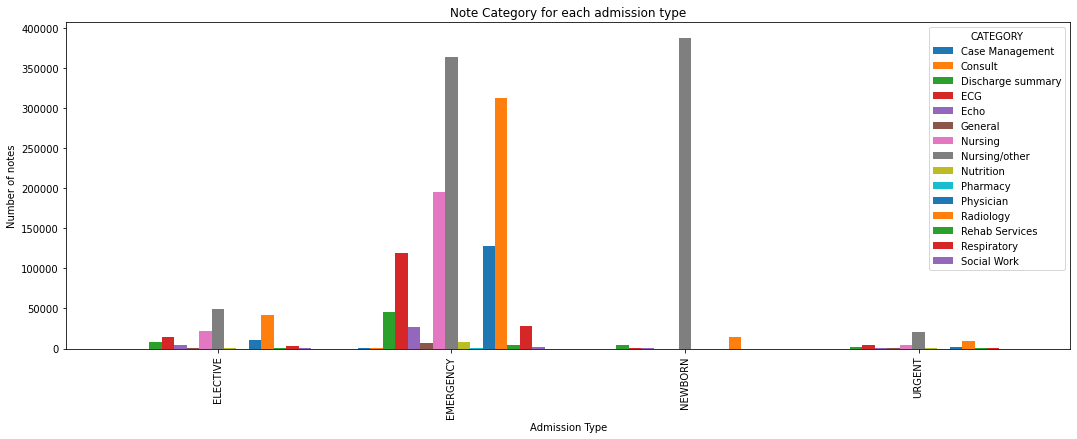

In [10]:
ax = df.groupby('CATEGORY').ADMISSION_TYPE.value_counts().unstack(0).plot.bar(width=0.8)
ax.set_title("Note Category for each admission type")
ax.set_xlabel("Admission Type")
ax.set_ylabel("Number of notes")
ax.figure.set_size_inches(18, 6)
fig.savefig("../plot/note_category_per_admission_type.png")

In [11]:
df.groupby('CATEGORY').ADMISSION_TYPE.value_counts()

CATEGORY           ADMISSION_TYPE
Case Management    EMERGENCY            915
                   ELECTIVE              26
                   URGENT                13
Consult            EMERGENCY             87
                   ELECTIVE              10
                   URGENT                 1
Discharge summary  EMERGENCY          45586
                   ELECTIVE            8378
                   NEWBORN             4054
                   URGENT              1628
ECG                EMERGENCY         119110
                   ELECTIVE           14400
                   URGENT              4053
                   NEWBORN              622
Echo               EMERGENCY          27398
                   ELECTIVE            4504
                   NEWBORN             1169
                   URGENT               965
General            EMERGENCY           7422
                   ELECTIVE             606
                   URGENT               181
Nursing            EMERGENCY         19537

We found 34864 visits with at least one assigned "nursing note", we have 58328 visits in the dataset.

We found 22347 visits with 'ADMISSION_TYPE'=="EMERGENCY" and at least one assigned "nursing note", we have 58328 visits in the dataset.

In [12]:
df.groupby('CATEGORY')['TEXT'].apply(lambda x: np.mean(x.str.len()))

CATEGORY
Case Management      1124.632075
Consult              6035.591837
Discharge summary    9619.263303
ECG                   216.247299
Echo                 2282.429692
General              1564.148861
Nursing              1786.612517
Nursing/other         798.948144
Nutrition            2432.867669
Pharmacy             2584.696078
Physician            7137.120428
Radiology            1659.899731
Rehab Services       3121.288963
Respiratory          1358.279629
Social Work          2151.354518
Name: TEXT, dtype: float64

In [13]:
df.groupby('CATEGORY')['TEXT'].apply(lambda x: np.min(x.str.len()))

CATEGORY
Case Management      120
Consult              425
Discharge summary     54
ECG                    3
Echo                 282
General                7
Nursing                3
Nursing/other          3
Nutrition             10
Pharmacy               7
Physician              6
Radiology            333
Rehab Services         7
Respiratory            7
Social Work           32
Name: TEXT, dtype: int64

In [14]:
df.groupby('CATEGORY')['TEXT'].apply(lambda x: np.max(x.str.len()))

CATEGORY
Case Management       7144
Consult              16817
Discharge summary    55728
ECG                   1180
Echo                  6150
General              16985
Nursing              24282
Nursing/other         3970
Nutrition            12063
Pharmacy             33753
Physician            26477
Radiology            20155
Rehab Services        9828
Respiratory           6576
Social Work          13813
Name: TEXT, dtype: int64

### Number of notes associated to each admission grouped by category

In [15]:
Notes_List = df.groupby(['HADM_ID', 'CATEGORY']).count()['TEXT'].value_counts()

<AxesSubplot:>

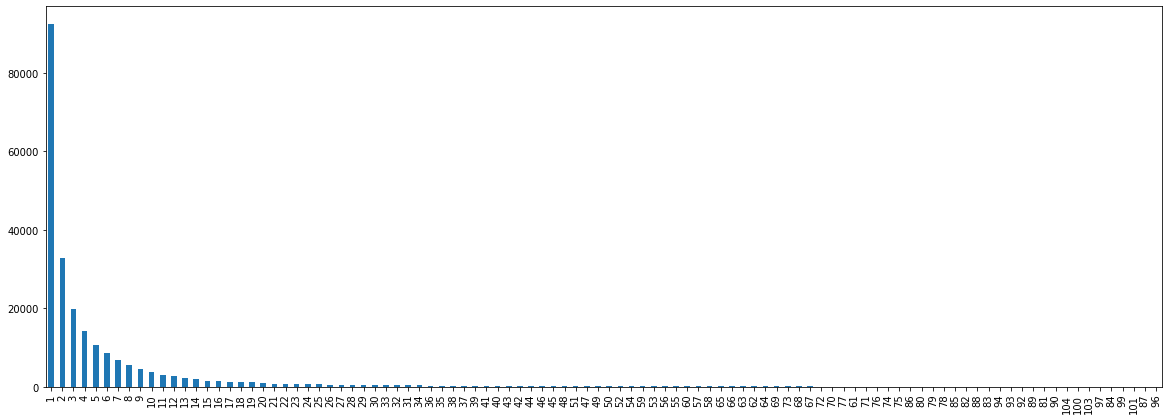

In [16]:
Notes_List[0:100].plot(kind='bar', figsize=(20, 7))
# 2848 ammissioni hanno 2 note associate.... 1 ammissione ha 959 note associate